<h2>Getting started with your Lab Sandbox</h2>
<p>You can find important course-specific tips and notes for your Lab Sandbox in this <br>
    quick guide to use throughout your course. You’ll be able to reference this at any time <br>
    or visit the <a href="https://learner.coursera.help/hc/articles/360062301971">Learner Help Center</a>
    for more info. </p>
    
<p> Throughout this course, you'll encounter datasets which are hosted on other websites or are linked from the course instructional materials. If you'd like to complete your work in the lab sandbox environment, please download these datasets from their listed websites and upload the data files directly into your RStudio lab environment. Lab Sandboxes have limited access to external sites, so uploading your data files directly will help ensure you do not encounter any access errors. </p>
    
<h2>What tools are already installed in my sandbox environment?</h2>
<ul>
  <li>Python==3.7.6</li>
  <li>turicreate==6.4.1</li>
  <li>scikit-learn(same as sklearn)==0.22.2.post1</li>
  <li>pandas==1.0.3</li>
  <li>numpy==1.18.4</li>
  <li>matplotlib==3.2.1</li>
  <li>unzip for uploading/unpacking data and files via Jupyter's built-in Terminal</li>
</ul>
    
<h2>Additional Course Specific Notes:</h2>
<ul>
    <li><b>IMPORTANT: To optimize your notebook performance, please shut down each of your <br>
        open/running Jupyter Notebooks after you complete them within your Lab</b>. <br>
        This will provide full and dedicated system resources to the current lab assignment<br>
        you are working on in your Lab Sandbox. If you experience any unexpected slow <br>
        processing in your notebook, try to restart your Lab kernel and only open that single <br>
        notebook to complete your work. You can learn more about restarting your Lab Sandbox <br>
        and troubleshooting your lab in our Learner Help Center article <a href="https://learner.coursera.help/hc/articles/360044758731-Solving-Common-Issues-with-Coursera-Labs">here</a>.</li><br>
    <li>Ensure you are using Python3 to complete the assessments. In Python3, the print statement syntax<br> 
        is print("Hello") rather than print "Hello" as stated in the solution files</li><br>
    <li>Upload the unzipped files to the Labs Sandbox.</li><br>
    <li><b>It is highly advised to practice with turicreate if you use this sandbox</b> as it 
        can be used on large datasets.<br> Turicreate and python3 will be the preferred/supported route for the 
        sandbox, <br> 
        to enable a newer version of python and avoid compatibility issues between versions. <br> 
        If you prefer to have Python2 installed in your local system, you can use Sframe or graphlab locally as well. <br>You are still able to complete all assignments 
        locally if you would prefer using other tools.</li><br>
    <li>As an important note, the sandbox environment 
        has limited access to the internet, so you will not be <br>
        able to install additional packages into this sandbox. However, the required dependencies for the Python3, <br> Jupyter Notebook, and turicreate path are pre-installed. This should still allow you to complete your coursework<br>  in the sandbox  if you are unable to complete it locally. If you find that you are blocked using available tools in this <br> sandbox at any point, please reach out to Coursera through the Learner Help
        Center with your feedback! </li><br> 
    <li>Decide on which tool you'd like to use at the very beginning of the course. It is highly advisable <br>
        not to switch between turicreate and other Python libraries such as sklearn or Pandas.</li><br>
    <li>If anything is unclear regarding the course content, please go through the <br>
        Discussion board and see if your question has been answered. If you have any issues <br>
        with the Jupyter enviornment itself, please contact Coursera through the <a href="https://learner.coursera.help">Learner Help Center.</a></li><br>
</ul>

<h2>Important Note:</h2><br>
<li> To use SFrame, kindly import the package turicreate, as the prior standalone SFrame package is not compatible with Python 3.X.</li><br>
<li> Run the following code to get started: from turicreate import sframe </li><br>

<p>Happy Learning!</p>


In [1]:
! pip install turicreate==6.4.1

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!unzip people_wiki.sframe.zip

Archive:  people_wiki.sframe.zip
replace people_wiki.sframe/m_cf05efad0f89a530.frame_idx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
from __future__ import print_function # to conform python 2.x print to python 3.x
import turicreate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
wiki = turicreate.SFrame('people_wiki.sframe')

In [8]:
wiki

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [89]:
wiki['word_count'] = turicreate.text_analytics.count_words(wiki['text'])

In [10]:
model = turicreate.nearest_neighbors.create(wiki, label='name', features=['word_count'],
                                            method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [11]:
model.query(wiki[wiki['name']=='Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 3.948ms      |

| Done         |         | 100         | 407.18ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Joe Biden,33.075670817082454,2
Barack Obama,George W. Bush,34.39476704383968,3
Barack Obama,Lawrence Summers,36.15245496505044,4
Barack Obama,Mitt Romney,36.16628264005025,5
Barack Obama,Francisco Barrio,36.3318042491699,6
Barack Obama,Walter Mondale,36.40054944640259,7
Barack Obama,Wynn Normington Hugh-Jones ...,36.49657518178932,8
Barack Obama,Don Bonker,36.6333181680284,9
Barack Obama,Andy Anstett,36.959437225152655,10


In [12]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name=['word','count'])
    return word_count_table.sort('count', ascending=False)

In [13]:
obama_words = top_words('Barack Obama')
obama_words

word,count
the,40.0
in,30.0
and,21.0
of,18.0
to,14.0
his,11.0
obama,9.0
act,8.0
a,7.0
he,7.0


In [14]:
barrio_words = top_words('Francisco Barrio')
barrio_words

word,count
the,36.0
of,24.0
and,18.0
in,17.0
he,10.0
to,9.0
chihuahua,7.0
governor,6.0
a,6.0
as,5.0


In [15]:
combined_words = obama_words.join(barrio_words, on='word')
combined_words

word,count,count.1
the,40.0,36.0
in,30.0,17.0
and,21.0,18.0
of,18.0,24.0
to,14.0,9.0
his,11.0,5.0
a,7.0,6.0
he,7.0,10.0
as,6.0,5.0
was,5.0,4.0


In [16]:
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Barrio'})
combined_words

word,Obama,Barrio
the,40.0,36.0
in,30.0,17.0
and,21.0,18.0
of,18.0,24.0
to,14.0,9.0
his,11.0,5.0
a,7.0,6.0
he,7.0,10.0
as,6.0,5.0
was,5.0,4.0


In [19]:
combined_words.sort('Obama', ascending=False)[:5]

word,Obama,Barrio
the,40.0,36.0
in,30.0,17.0
and,21.0,18.0
of,18.0,24.0
to,14.0,9.0


In [24]:
common_words = set(combined_words.sort('Obama', ascending=False)[:5]['word']) # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return common_words.issubset(unique_words)  # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
... # YOUR CODE HERE
wiki['has_top_words'].sum()

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

56066

In [25]:
len(wiki['has_top_words'])

59071

In [26]:
print('Output from your function:', has_top_words(wiki[32]['word_count']))
print('Correct output: True')
print('Also check the length of unique_words. It should be 167')
print(len(wiki[32]['word_count']))

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
167


In [27]:
print('Output from your function:', has_top_words(wiki[33]['word_count']))
print('Correct output: False')
print('Also check the length of unique_words. It should be 188')
print(len(wiki[33]['word_count']))

Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188
188


In [31]:
o = wiki[wiki['name'] == 'Barack Obama']['word_count'][0]
b = wiki[wiki['name'] == 'George W. Bush']['word_count'][0]
j = wiki[wiki['name'] == 'Joe Biden']['word_count'][0]
turicreate.toolkits.distances.euclidean(o, b)

34.39476704383968

In [32]:
turicreate.toolkits.distances.euclidean(o, j)

33.075670817082454

In [33]:
turicreate.toolkits.distances.euclidean(j, b)

32.7566787083184

In [34]:
bush_words = top_words('George W. Bush')
combined_words = obama_words.join(bush_words, on='word')
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Bush'})
combined_words.sort('Obama', ascending=False)

word,Obama,Bush
the,40.0,39.0
in,30.0,22.0
and,21.0,14.0
of,18.0,14.0
to,14.0,11.0
his,11.0,6.0
act,8.0,3.0
a,7.0,6.0
he,7.0,8.0
as,6.0,6.0


In [90]:
wiki['tf_idf'] = turicreate.text_analytics.tf_idf(wiki['word_count'])

In [91]:
model_tf_idf = turicreate.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                   method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [92]:
model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 13.071ms     |

| Done         |         | 100         | 467.194ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Phil Schiliro,106.86101369140928,2
Barack Obama,Jeff Sessions,108.87167421571078,3
Barack Obama,Jesse Lee (politician),109.04569790902957,4
Barack Obama,Samantha Power,109.10810616502708,5
Barack Obama,Bob Menendez,109.78186710530215,6
Barack Obama,Eric Stern (politician),109.9577880796839,7
Barack Obama,James A. Guest,110.4138887175989,8
Barack Obama,Roland Grossenbacher,110.47060870018984,9
Barack Obama,Tulsi Gabbard,110.6969979988001,10


In [93]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    return word_count_table.sort('weight', ascending=False)

In [94]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
obama_tf_idf

word,weight
obama,43.2956530720749
act,27.67822262297991
iraq,17.747378587965535
control,14.887060845181308
law,14.722935761763422
ordered,14.533373950913514
military,13.115932778499415
involvement,12.784385241175055
response,12.784385241175055
democratic,12.410688697332166


In [95]:
schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
schiliro_tf_idf

word,weight
schiliro,21.972990778450388
staff,15.856441635180534
congressional,13.547087656327776
daschleschiliro,10.986495389225194
obama,9.621256238238866
waxman,9.04058524016988
president,9.033586614158258
2014from,8.683910296231149
law,7.361467880881711
consultant,6.913104037247212


In [97]:
combined_words = obama_tf_idf.join(schiliro_tf_idf, on='word')
combined_words = combined_words.rename({'weight':'Obama', 'weight.1':'Schiliro'})
combined_words.sort('Obama', ascending=False)

word,Obama,Schiliro
obama,43.2956530720749,9.621256238238866
law,14.722935761763422,7.361467880881711
democratic,12.410688697332166,6.205344348666083
senate,10.164288179703693,3.3880960599012306
presidential,7.386955418904825,3.6934777094524125
president,7.226869291326606,9.033586614158258
policy,6.095386282141427,3.0476931410707135
states,5.473200989631017,1.824400329877006
office,5.2481728232196465,2.6240864116098233
2011,5.107041270312876,3.4046941802085837


In [98]:
common_words = set(combined_words.sort('Obama', ascending=False)[:5]['word']) # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return common_words.issubset(unique_words)  # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
... # YOUR CODE HERE
wiki['has_top_words'].sum()

# use has_top_words column to answer the quiz question
# ...  # YOUR CODE HERE

14

In [99]:
common_words

{'democratic', 'law', 'obama', 'presidential', 'senate'}

In [100]:
biden_tf_idf = top_words_tf_idf('Joe Biden')

In [101]:
biden_tf_idf

word,weight
biden,63.92610492536963
obama,19.24251247647773
act,17.298889139362444
vice,15.355736099810581
resolved,13.135309562857193
senator,11.716882477603237
delaware,11.396456717061318
judiciary,11.011712931766406
dosf,10.986495389225194
thomasbiden,10.986495389225194


In [102]:
combined_words = obama_tf_idf.join(biden_tf_idf, on='word')
combined_words['weight'], combined_words['weight.1']

(dtype: float
 Rows: 84
 [43.2956530720749, 27.67822262297991, 17.747378587965535, 14.887060845181308, 14.722935761763422, 13.115932778499415, 12.410688697332166, 11.591942692842837, 10.164288179703693, 9.43101391473379, 9.319341564760851, 8.907053847545358, 8.842460838379667, 7.712676160711769, 7.654290879049991, 7.431147327735781, 7.386955418904825, 7.226869291326606, 7.0620334604226676, 6.642689967371511, 6.642689967371511, 6.3816977057812005, 6.095386282141427, 5.656236009557883, 5.6158573610975315, 5.592867842872833, 5.473200989631017, 5.107041270312876, 5.067601534952048, 4.88376320446593, 4.831637295208776, 4.703766236011668, 4.693309450812809, 4.594578275832593, 4.545548848592274, 4.523465932304524, 4.327201469541557, 4.176352939110058, 4.03568062078261, 4.015765311081669, 3.9453132752336004, 3.9140734886878232, 3.7697859025157365, 3.7451291059028766, 3.723866788250953, 3.68265216394749, 3.6593720969659014, 3.446936559924164, 3.445873860568042, 3.3821333532750204, 3.34485166297

In [104]:
combined_words

word,weight,weight.1
obama,43.2956530720749,19.24251247647773
act,27.67822262297991,17.298889139362444
iraq,17.747378587965535,4.436844646991384
control,14.887060845181308,7.443530422590654
law,14.722935761763422,2.4538226269605703
military,13.115932778499415,3.2789831946248538
democratic,12.410688697332166,9.308016522999125
us,11.591942692842837,9.659952244035697
senate,10.164288179703693,10.164288179703693
nominee,9.43101391473379,4.715506957366895


In [111]:
turicreate.toolkits.distances.euclidean(list(combined_words['weight']), list(combined_words['weight.1']))

37.90533065920024

In [109]:
turicreate.toolkits.distances.euclidean(wiki[wiki['name'] == 'Barack Obama']['tf_idf'][0], 
                                        wiki[wiki['name'] == 'Joe Biden']['tf_idf'][0])

123.29745600964294

In [44]:
model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 5.258ms      |

| Done         |         | 100         | 498.118ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Phil Schiliro,106.86101369140928,2
Barack Obama,Jeff Sessions,108.87167421571078,3
Barack Obama,Jesse Lee (politician),109.04569790902957,4
Barack Obama,Samantha Power,109.10810616502708,5
Barack Obama,Bob Menendez,109.78186710530215,6
Barack Obama,Eric Stern (politician),109.9577880796839,7
Barack Obama,James A. Guest,110.4138887175989,8
Barack Obama,Roland Grossenbacher,110.47060870018984,9
Barack Obama,Tulsi Gabbard,110.6969979988001,10


In [45]:
def compute_length(row):
    return len(row['text'].split(' '))

wiki['length'] = wiki.apply(compute_length) 

In [46]:
nearest_neighbors_euclidean = model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=100)
nearest_neighbors_euclidean = nearest_neighbors_euclidean.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 7.05ms       |

| Done         |         | 100         | 574.183ms    |

+--------------+---------+-------------+--------------+

In [47]:
nearest_neighbors_euclidean.sort('rank')

query_label,reference_label,distance,rank,length
Barack Obama,Barack Obama,0.0,1,540
Barack Obama,Phil Schiliro,106.86101369140928,2,208
Barack Obama,Jeff Sessions,108.87167421571078,3,230
Barack Obama,Jesse Lee (politician),109.04569790902957,4,216
Barack Obama,Samantha Power,109.10810616502708,5,310
Barack Obama,Bob Menendez,109.78186710530215,6,220
Barack Obama,Eric Stern (politician),109.9577880796839,7,255
Barack Obama,James A. Guest,110.4138887175989,8,215
Barack Obama,Roland Grossenbacher,110.47060870018984,9,201
Barack Obama,Tulsi Gabbard,110.6969979988001,10,228


AttributeError: 'Polygon' object has no property 'normed'

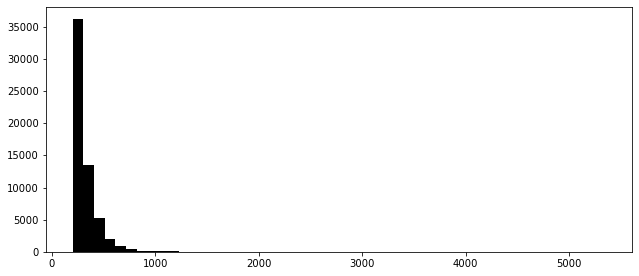

In [48]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [ ]:
model2_tf_idf = turicreate.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                    method='brute_force', distance='cosine')

In [ ]:
nearest_neighbors_cosine = model2_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=100)
nearest_neighbors_cosine = nearest_neighbors_cosine.join(wiki[['name', 'length']], on={'reference_label':'name'})

In [ ]:
nearest_neighbors_cosine.sort('rank')

In [ ]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [49]:
sf = turicreate.SFrame({'text': ['democratic governments control law in response to popular act']})
sf['word_count'] = turicreate.text_analytics.count_words(sf['text'])

encoder = turicreate.toolkits._feature_engineering.TFIDF(features=['word_count'], output_column_prefix='tf_idf')
encoder.fit(wiki)
sf = encoder.transform(sf)
sf

text,word_count,tf_idf.word_count
democratic governmentscontrol law in response ...,"{'act': 1.0, 'popular':1.0, 'in': 1.0, 'law': ...","{'act':3.4597778278724887, ..."


In [50]:
tweet_tf_idf = sf[0]['tf_idf.word_count']
tweet_tf_idf

{'act': 3.4597778278724887,
 'popular': 2.764478952022998,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'control': 3.721765211295327,
 'response': 4.261461747058352,
 'governments': 4.167571323949673,
 'to': 0.04694493768179923,
 'democratic': 3.1026721743330414}

In [51]:
obama = wiki[wiki['name'] == 'Barack Obama']
obama

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	has_top_words	int
	tf_idf	dict
	length	int

Rows: Unknown

Data:
+-------------------------------+--------------+-------------------------------+
|              URI              |     name     |              text             |
+-------------------------------+--------------+-------------------------------+
| <http://dbpedia.org/resour... | Barack Obama | barack hussein obama ii br... |
+-------------------------------+--------------+-------------------------------+
+-------------------------------+---------------+-------------------------------+
|           word_count          | has_top_words |             tf_idf            |
+-------------------------------+---------------+-------------------------------+
| {'normalize': 1.0, 'sought... |       1       | {'normalize': 10.293348208... |
+-------------------------------+---------------+-------------------------------+
+--------+
| length |
+--------+
|  540   |
+--------+
[? rows x 7 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [52]:
obama_tf_idf = obama[0]['tf_idf']
turicreate.toolkits.distances.cosine(obama_tf_idf, tweet_tf_idf)

0.7059183777794329

In [ ]:
model2_tf_idf.query(obama, label='name', k=10)

In [3]:
from __future__ import print_function # to conform python 2.x print to python 3.x
import numpy as np
import turicreate
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_distances
import time
from copy import copy
import matplotlib.pyplot as plt
%matplotlib inline

'''compute norm of a sparse vector
   Thanks to: Jaiyam Sharma'''
def norm(x):
    sum_sq=x.dot(x.T)
    norm=np.sqrt(sum_sq)
    return(norm)

In [4]:
wiki = turicreate.SFrame('people_wiki.sframe/')

In [5]:
wiki = wiki.add_row_number()

In [6]:
wiki['tf_idf'] = turicreate.text_analytics.tf_idf(wiki['text'])
wiki.head()

id,URI,name,text,tf_idf
0,<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'melbourne':3.8914310119380633, ..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'time':1.3253342074200498, ..."
2,<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'society':2.4448047262085693, ..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'kurdlawitzpreis':10.986495389225194, ..."
4,<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'curtis':5.299520032885375, ..."
5,<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'asses':9.600201028105303, 's ..."
6,<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'streamz':10.986495389225194, ..."
7,<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'concordia':6.250296940830698, ..."
8,<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'heavies':8.907053847545358, 'n ..."
9,<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'2002':1.8753125887822302, ..."


In [7]:
def sframe_to_scipy(x, column_name):
    '''
    Convert a dictionary column of an SFrame into a sparse matrix format where
    each (row_id, column_id, value) triple corresponds to the value of
    x[row_id][column_id], where column_id is a key in the dictionary.
       
    Example
    >>> sparse_matrix, map_key_to_index = sframe_to_scipy(sframe, column_name)
    '''
    assert type(x[column_name][0]) == dict, \
        'The chosen column must be dict type, representing sparse data.'
    
    # Stack will transform x to have a row for each unique (row, key) pair.
    x = x.stack(column_name, ['feature', 'value'])
    
    # Map feature words to integers 
    unique_words = sorted(x['feature'].unique())
    mapping = {word:i for i, word in enumerate(unique_words)}
    x['feature_id'] = x['feature'].apply(lambda x: mapping[x])
    
    # Create numpy arrays that contain the data for the sparse matrix.
    row_id = np.array(x['id'])
    col_id = np.array(x['feature_id'])
    data = np.array(x['value'])
    
    width = x['id'].max() + 1
    height = x['feature_id'].max() + 1
    
    # Create a sparse matrix.
    mat = csr_matrix((data, (row_id, col_id)), shape=(width, height))
    return mat, mapping

In [8]:
%%time
corpus, mapping = sframe_to_scipy(wiki, 'tf_idf')

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

CPU times: user 3min 23s, sys: 11.7 s, total: 3min 34s
Wall time: 3min 17s


In [9]:
assert corpus.shape == (59071, 547979)
print('Check passed correctly!')

Check passed correctly!


In [10]:
def generate_random_vectors(dim, n_vectors):
    return np.random.randn(dim, n_vectors)

In [11]:
# Generate 16 random vectors of dimension 547979
np.random.seed(0)
n_vectors = 16
random_vectors = generate_random_vectors(corpus.shape[1], n_vectors)
random_vectors.shape

(547979, 16)

In [12]:
sample = corpus[0] # vector of tf-idf values for document 0
bin_indices_bits = sample.dot(random_vectors[:,0]) >= 0
bin_indices_bits

array([ True])

In [13]:
sample.dot(random_vectors[:, 1]) >= 0 # True if positive sign; False if negative sign

array([False])

In [14]:
sample.dot(random_vectors) >= 0 # should return an array of 16 True/False bits

array([[ True, False, False, False,  True, False,  True, False,  True,
         True,  True, False,  True,  True, False,  True]])

In [15]:
np.array(sample.dot(random_vectors) >= 0, dtype=int) # display index bits in 0/1's

array([[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]])

In [16]:
corpus[0:2].dot(random_vectors) >= 0 # compute bit indices of first two documents

array([[ True, False, False, False,  True, False,  True, False,  True,
         True,  True, False,  True,  True, False,  True],
       [False, False, False, False,  True, False, False, False,  True,
         True,  True, False, False,  True, False,  True]])

In [17]:
corpus.dot(random_vectors) >= 0 # compute bit indices of ALL documents

array([[ True, False, False, ...,  True, False,  True],
       [False, False, False, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False,  True]])

In [18]:
index_bits = (sample.dot(random_vectors) >= 0)
powers_of_two = (1 << np.arange(15, -1, -1))
print(index_bits)
print(powers_of_two)
print(index_bits.dot(powers_of_two))

[[ True False False False  True False  True False  True  True  True False
   True  True False  True]]
[32768 16384  8192  4096  2048  1024   512   256   128    64    32    16
     8     4     2     1]
[35565]


In [19]:
index_bits = sample.dot(random_vectors) >= 0
index_bits.dot(powers_of_two)

array([35565])

In [20]:
from collections import defaultdict 

def train_lsh(data, n_vectors, seed=None):    
    if seed is not None:
        np.random.seed(seed)

    dim = data.shape[1]
    random_vectors = generate_random_vectors(dim, n_vectors)  

    # Partition data points into bins,
    # and encode bin index bits into integers
    bin_indices_bits = data.dot(random_vectors) >= 0
    powers_of_two = 1 << np.arange(n_vectors - 1, -1, step=-1)
    bin_indices = bin_indices_bits.dot(powers_of_two)

    # Update `table` so that `table[i]` is the list of document ids with bin index equal to i
    table = defaultdict(list)
    for idx, bin_index in enumerate(bin_indices):
        # Fetch the list of document ids associated with the bin and add the document id to the end.
        # data_index: document ids
        # append() will add a list of document ids to table dict() with key as bin_index
        table[bin_index].append(idx)   # YOUR CODE HERE
    
    # Note that we're storing the bin_indices here
    # so we can do some ad-hoc checking with it,
    # this isn't actually required
    model = {'data': data,
             'table': table,
             'random_vectors': random_vectors,
             'bin_indices': bin_indices,
             'bin_indices_bits': bin_indices_bits}
    return model

In [21]:
def compare_bits(model, id_1, id_2):
    bits1 = model['bin_indices_bits'][id_1]
    bits2 = model['bin_indices_bits'][id_2]
    print('Number of agreed bits: ', np.sum(bits1 == bits2))
    return np.sum(bits1 == bits2)

In [22]:
model = train_lsh(corpus, 16, seed=475)
obama_id = wiki[wiki['name'] == 'Barack Obama']['id'][0]
biden_id = wiki[wiki['name'] == 'Joe Biden']['id'][0]
similariy = compare_bits(model, obama_id, biden_id)

Number of agreed bits:  15


In [23]:
# This function will help us get similar items, given the id
def get_similarity_items(X_tfidf, item_id, topn=5):
    """
    Get the top similar items for a given item id.
    The similarity measure here is based on cosine distance.
    """
    query = X_tfidf[item_id]
    scores = X_tfidf.dot(query.T).toarray().ravel()
    best = np.argpartition(scores, -topn)[-topn:]
    similar_items = sorted(zip(best, scores[best]), key=lambda x: -x[1])
    similar_item_ids = [similar_item for similar_item, _ in similar_items]
    print("Similar items to id: {}".format(item_id))
    for _id in similar_item_ids:
        print(wiki[_id]['name'])
    print('\n')
    return similar_item_ids

In [24]:
wiki[wiki['name'] == 'Barack Obama']

id,URI,name,text,tf_idf
35817,<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,"{'normalize':10.293348208665249, ..."


In [25]:
obama_id

35817

In [26]:
s = ''.join(map(str,model['bin_indices_bits'][obama_id].astype(int)))
sum(int(c) * (2 ** i) for i, c in enumerate(s[::-1]))

38448

In [27]:
#s = '1110'
#sum(int(c) * (2 ** i) for i, c in enumerate(s[::-1]))

In [28]:
wiki[wiki['name'] == 'Joe Biden']

id,URI,name,text,tf_idf
24478,<http://dbpedia.org/resource/Joe_Biden> ...,Joe Biden,joseph robinette joebiden jr dosf rbnt badn ...,"{'were':1.521978023354629, ..."


In [29]:
so = ''.join(map(str,model['bin_indices_bits'][obama_id].astype(int)))
sb = ''.join(map(str,model['bin_indices_bits'][biden_id].astype(int)))
sum([so[i]==sb[i] for i in range(len(so))])

15

In [30]:
jones_id = wiki[wiki['name']=='Wynn Normington Hugh-Jones']['id'][0]
compare_bits(model, obama_id, jones_id)

Number of agreed bits:  8


8

In [31]:
model['bin_indices'][obama_id]

38448

In [32]:
model['table'][model['bin_indices'][obama_id]]

[35817, 54743]

In [33]:
doc_ids = list(model['table'][model['bin_indices'][35817]])
doc_ids.remove(35817) # display documents other than Obama

docs = wiki.filter_by(values=doc_ids, column_name='id') # filter by id column
docs

id,URI,name,text,tf_idf
54743,<http://dbpedia.org/resource/Radovan_%C5%BDerjav> ...,Radovan %C5%BDerjav,radovan erjav born 2december 1968 is a ...,"{'hungarian':5.299520032885375, ..."


In [34]:
res = compare_bits(model, obama_id, docs[0]['id']), compare_bits(model, obama_id, biden_id)

Number of agreed bits:  16
Number of agreed bits:  15


In [35]:
from itertools import combinations

In [36]:
num_vector = 16
search_radius = 3

for diff in combinations(range(num_vector), search_radius):
    print(diff)

(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 1, 13)
(0, 1, 14)
(0, 1, 15)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 2, 13)
(0, 2, 14)
(0, 2, 15)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 3, 13)
(0, 3, 14)
(0, 3, 15)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 4, 11)
(0, 4, 12)
(0, 4, 13)
(0, 4, 14)
(0, 4, 15)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 5, 10)
(0, 5, 11)
(0, 5, 12)
(0, 5, 13)
(0, 5, 14)
(0, 5, 15)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 6, 10)
(0, 6, 11)
(0, 6, 12)
(0, 6, 13)
(0, 6, 14)
(0, 6, 15)
(0, 7, 8)
(0, 7, 9)
(0, 7, 10)
(0, 7, 11)
(0, 7, 12)
(0, 7, 13)
(0, 7, 14)
(0, 7, 15)
(0, 8, 9)
(0, 8, 10)
(0, 8, 11)
(0, 8, 12)
(0, 8, 13)
(0, 8, 14)
(0, 8, 15)
(0, 9, 10)
(0, 9, 11)
(0, 9, 12)
(0, 9, 13)
(0, 9, 14)
(0, 9, 15)
(0, 10, 11)
(0, 10, 12)
(0, 10, 13)
(0, 10, 14

In [37]:
def search_nearby_bins(query_bin_bits, table, search_radius=2, initial_candidates=set()):
    """
    For a given query vector and trained LSH model, return all candidate neighbors for
    the query among all bins within the given search radius.
    
    Example usage
    -------------
    >>> model = train_lsh(corpus, num_vector=16, seed=143)
    >>> q = model['bin_index_bits'][0]  # vector for the first document
  
    >>> candidates = search_nearby_bins(q, model['table'])
    """
    num_vector = len(query_bin_bits)
    powers_of_two = 1 << np.arange(num_vector-1, -1, -1)
    
    # Allow the user to provide an initial set of candidates.
    candidate_set = copy(initial_candidates)
    
    for different_bits in combinations(range(num_vector), search_radius):       
        # Flip the bits (n_1,n_2,...,n_r) of the query bin to produce a new bit vector.
        ## Hint: you can iterate over a tuple like a list
        alternate_bits = copy(query_bin_bits)
        for i in different_bits:
            alternate_bits[i] = 1 - alternate_bits[i] # YOUR CODE HERE 
        
        # Convert the new bit vector to an integer index
        nearby_bin = alternate_bits.dot(powers_of_two)
        
        # Fetch the list of documents belonging to the bin indexed by the new bit vector.
        # Then add those documents to candidate_set
        # Make sure that the bin exists in the table!
        # Hint: update() method for sets lets you add an entire list to the set
        if nearby_bin in table:
            more_docs = table[nearby_bin] # Get all document_ids of the bin
            ... # YOUR CODE HERE: Update candidate_set with the documents in this bin.
            candidate_set.update(more_docs)
            
    return candidate_set

In [38]:
obama_bin_index = model['bin_indices_bits'][35817] # bin index of Barack Obama
candidate_set = search_nearby_bins(obama_bin_index, model['table'], search_radius=0)
if candidate_set == set({35817, 54743}):
    print('Passed test')
else:
    print('Check your code')
print('List of documents in the same bin as Obama: {}'.format(candidate_set))

Passed test
List of documents in the same bin as Obama: {35817, 54743}


In [39]:
candidate_set = search_nearby_bins(obama_bin_index, model['table'], search_radius=1, initial_candidates=candidate_set)
if candidate_set == set({42243, 28804, 1810, 48919, 24478, 31010, 7331, 23716, 51108, 48040, 36266, 33200, 25023, 23617, 54743, 34910, 35817, 34159, 14451, 23926, 39032, 12028, 43775}):
    print('Passed test')
else:
    print('Check your code')
print(candidate_set)

Passed test
{42243, 28804, 1810, 48919, 24478, 31010, 7331, 23716, 51108, 48040, 36266, 33200, 25023, 23617, 54743, 34910, 35817, 34159, 14451, 23926, 39032, 12028, 43775}


In [40]:
def query(vec, model, k, max_search_radius):
  
    data = model['data']
    table = model['table']
    random_vectors = model['random_vectors']
    num_vector = random_vectors.shape[1]
    
    
    # Compute bin index for the query vector, in bit representation.
    bin_index_bits = (vec.dot(random_vectors) >= 0).flatten()
    
    # Search nearby bins and collect candidates
    candidate_set = set()
    for search_radius in range(max_search_radius+1):
        candidate_set = search_nearby_bins(bin_index_bits, table, search_radius, initial_candidates=candidate_set)
    
    # Sort candidates by their true distances from the query
    nearest_neighbors = turicreate.SFrame({'id':candidate_set})
    candidates = data[np.array(list(candidate_set)),:]
    nearest_neighbors['distance'] = pairwise_distances(candidates, vec, metric='cosine').flatten()
    
    return nearest_neighbors.topk('distance', k, reverse=True), len(candidate_set)

In [41]:
query(corpus[35817,:], model, k=10, max_search_radius=3)

(Columns:
 	id	int
 	distance	float
 
 Rows: 10
 
 Data:
 +-------+------------------------+
 |   id  |        distance        |
 +-------+------------------------+
 | 35817 | 1.1102230246251565e-16 |
 | 24478 |   0.703138676733575    |
 | 38376 |   0.7429819023278823   |
 |  4032 |   0.8145547486714284   |
 | 43155 |   0.8408390074837325   |
 | 20159 |   0.844036884280093    |
 | 11517 |   0.8483420107162964   |
 | 46332 |   0.8897020225435585   |
 | 22063 |   0.8946710479694914   |
 | 10437 |   0.9001571479475322   |
 +-------+------------------------+
 [10 rows x 2 columns],
 771)

In [42]:
query(corpus[35817,:], model, k=10, max_search_radius=3)[0].join(wiki[['id', 'name']], on='id').sort('distance')

id,distance,name
35817,1.1102230246251565e-16,Barack Obama
24478,0.703138676733575,Joe Biden
38376,0.7429819023278823,Samantha Power
4032,0.8145547486714284,Kenneth D. Thompson
43155,0.8408390074837325,Goodwin Liu
20159,0.844036884280093,Charlie Crist
11517,0.8483420107162964,Louis Susman
46332,0.8897020225435585,Tom Tancredo
22063,0.8946710479694914,Kathryn Troutman
10437,0.9001571479475322,David J. Hayes


In [43]:
wiki[wiki['name']=='Barack Obama']

id,URI,name,text,tf_idf
35817,<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,"{'normalize':10.293348208665249, ..."


In [45]:
%%time
num_candidates_history = []
query_time_history = []
max_distance_from_query_history = []
min_distance_from_query_history = []
average_distance_from_query_history = []

for max_search_radius in range(17):
    start=time.time()
    result, num_candidates = query(corpus[35817,:], model, k=10,
                                   max_search_radius=max_search_radius)
    end=time.time()
    query_time = end-start
    
    print('Radius:', max_search_radius)
    print(result.join(wiki[['id', 'name']], on='id').sort('distance'))
    #res = list(result.join(wiki[['id', 'name']], on='id')['distance'])
    #print(res)
    #print(np.mean(res))

    average_distance_from_query = result['distance'][1:].mean()
    max_distance_from_query = result['distance'][1:].max()
    min_distance_from_query = result['distance'][1:].min()
    print(average_distance_from_query)
    
    num_candidates_history.append(num_candidates)
    query_time_history.append(query_time)
    average_distance_from_query_history.append(average_distance_from_query)
    max_distance_from_query_history.append(max_distance_from_query)
    min_distance_from_query_history.append(min_distance_from_query)


Radius: 0
+-------+------------------------+---------------------+
|   id  |        distance        |         name        |
+-------+------------------------+---------------------+
| 35817 | 1.1102230246251565e-16 |     Barack Obama    |
| 54743 |    0.97334561058472    | Radovan %C5%BDerjav |
+-------+------------------------+---------------------+
[2 rows x 3 columns]

0.97334561058472
Radius: 1
+-------+------------------------+------------------------------+
|   id  |        distance        |             name             |
+-------+------------------------+------------------------------+
| 35817 | 1.1102230246251565e-16 |         Barack Obama         |
| 24478 |   0.703138676733575    |          Joe Biden           |
| 34159 |   0.9430865736846581   |       Jennifer Hudson        |
| 23926 |   0.9608039657958866   | Se%C3%A1n Power (politician) |
| 36266 |   0.9615994281067699   |         Ralph Weber          |
| 33200 |    0.97101213334657    |         Emrah Yucel          |
| 288

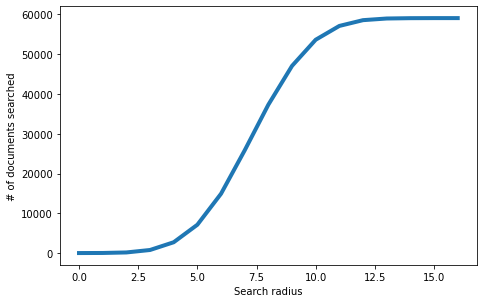

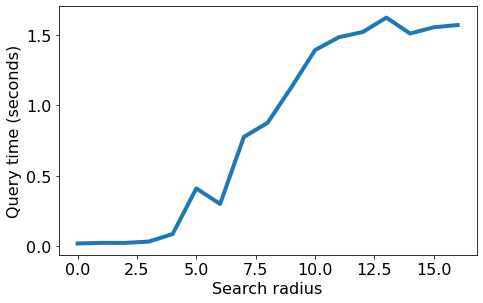

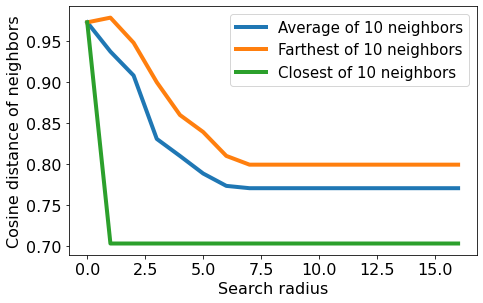

In [99]:
plt.figure(figsize=(7,4.5))
plt.plot(num_candidates_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('# of documents searched')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(query_time_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('Query time (seconds)')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(average_distance_from_query_history, linewidth=4, label='Average of 10 neighbors')
plt.plot(max_distance_from_query_history, linewidth=4, label='Farthest of 10 neighbors')
plt.plot(min_distance_from_query_history, linewidth=4, label='Closest of 10 neighbors')
plt.xlabel('Search radius')
plt.ylabel('Cosine distance of neighbors')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [2]:
from __future__ import print_function # to conform python 2.x print to python 3.x
import turicreate
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%matplotlib inline

In [3]:
wiki = turicreate.SFrame('people_wiki.sframe/')

In [4]:
wiki['tf_idf'] = turicreate.text_analytics.tf_idf(wiki['text'])

In [5]:
def sframe_to_scipy(x, column_name):
    '''
    Convert a dictionary column of an SFrame into a sparse matrix format where
    each (row_id, column_id, value) triple corresponds to the value of
    x[row_id][column_id], where column_id is a key in the dictionary.
       
    Example
    >>> sparse_matrix, map_key_to_index = sframe_to_scipy(sframe, column_name)
    '''
    assert type(x[column_name][0]) == dict, \
        'The chosen column must be dict type, representing sparse data.'
    
    # 1. Add a row number (id)
    x = x.add_row_number()

    # 2. Stack will transform x to have a row for each unique (row, key) pair.
    x = x.stack(column_name, ['feature', 'value'])

    # Map feature words to integers 
    unique_words = sorted(x['feature'].unique())
    mapping = {word:i for i, word in enumerate(unique_words)}
    x['feature_id'] = x['feature'].apply(lambda x: mapping[x])

    # Create numpy arrays that contain the data for the sparse matrix.
    row_id = np.array(x['id'])
    col_id = np.array(x['feature_id'])
    data = np.array(x['value'])
    
    width = x['id'].max() + 1
    height = x['feature_id'].max() + 1
    
    # Create a sparse matrix.
    mat = csr_matrix((data, (row_id, col_id)), shape=(width, height))
    return mat, mapping

In [6]:
%%time
# The conversion will take about a minute or two.
tf_idf, map_index_to_word = sframe_to_scipy(wiki, 'tf_idf')

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

CPU times: user 3min 7s, sys: 13.5 s, total: 3min 21s
Wall time: 3min 13s


In [7]:
tf_idf.shape

(59071, 547979)

In [8]:
from sklearn.preprocessing import normalize
tf_idf = normalize(tf_idf)

In [9]:
def get_initial_centroids(data, k, seed=None):
    '''Randomly choose k data points as initial centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    n = data.shape[0] # number of data points
        
    # Pick K indices from range [0, N).
    rand_indices = np.random.randint(0, n, k)
    
    # Keep centroids as dense format, as many entries will be nonzero due to averaging.
    # As long as at least one document in a cluster contains a word,
    # it will carry a nonzero weight in the TF-IDF vector of the centroid.
    centroids = data[rand_indices,:].toarray()
    
    return centroids

In [10]:
from sklearn.metrics import pairwise_distances

# Get the TF-IDF vectors for documents 100 through 102.
queries = tf_idf[100:102,:]

# Compute pairwise distances from every data point to each query vector.
dist = pairwise_distances(tf_idf, queries, metric='euclidean')

print(dist)

[[1.41000789 1.36894636]
 [1.40935215 1.41023886]
 [1.39855967 1.40890299]
 ...
 [1.41108296 1.39123646]
 [1.41022804 1.31468652]
 [1.39899784 1.41072448]]


In [11]:
k = 3
centroids = tf_idf[:k,:]
distances = pairwise_distances(tf_idf, centroids, metric='euclidean')
print(distances)
dist = pairwise_distances(tf_idf[430,:], centroids[1], metric='euclidean')
print(dist)

[[0.         1.40775177 1.38784582]
 [1.40775177 0.         1.39867641]
 [1.38784582 1.39867641 0.        ]
 ...
 [1.37070999 1.40978937 1.40616385]
 [1.35214578 1.41306211 1.40869799]
 [1.40799024 1.41353429 1.40903605]]
[[1.40713107]]


In [12]:
'''Test cell'''
if np.allclose(dist, pairwise_distances(tf_idf[430,:], tf_idf[1,:])):
    print('Pass')
else:
    print('Check your code again')

Pass


In [13]:
closest_cluster = np.argmin(distances, 1)
closest_cluster

array([0, 1, 2, ..., 0, 0, 0])

In [14]:
'''Test cell'''
reference = [list(row).index(min(row)) for row in distances]
if np.allclose(closest_cluster, reference):
    print('Pass')
else:
    print('Check your code again')

Pass


In [15]:
def get_cluster_assignments(data, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    return np.argmin(distances, 1)

cluster_assignment = get_cluster_assignments(tf_idf, centroids)

In [16]:
if len(cluster_assignment)==59071 and \
   np.array_equal(np.bincount(cluster_assignment), np.array([23061, 10086, 25924])):
    print('Pass') # count number of data points for each cluster
else:
    print('Check your code again.')

Pass


In [17]:
def assign_clusters(data, centroids):
    
    # Compute distances between each data point and the set of centroids:
    # Fill in the blank (RHS only)
    #distances_from_centroids = ...   # YOUR CODE HERE
    
    # Compute cluster assignments for each data point:
    # Fill in the blank (RHS only)
    cluster_assignment = get_cluster_assignments(data, centroids)   # YOUR CODE HERE
    
    return cluster_assignment

In [18]:
if np.allclose(assign_clusters(tf_idf[0:100:10], tf_idf[0:8:2]), np.array([0, 1, 1, 0, 0, 2, 0, 2, 2, 1])):
    print('Pass')
else:
    print('Check your code again.')

Pass


In [19]:
data = np.array([[1., 2., 0.],
                 [0., 0., 0.],
                 [2., 2., 0.]])
centroids = np.array([[0.5, 0.5, 0.],
                      [0., -0.5, 0.]])

In [20]:
cluster_assignment = assign_clusters(data, centroids)
print(cluster_assignment)

[0 1 0]


In [21]:
cluster_assignment==1

array([False,  True, False])

In [22]:
cluster_assignment==0

array([ True, False,  True])

In [23]:
data[cluster_assignment==1]

array([[0., 0., 0.]])

In [24]:
data[cluster_assignment==0]

array([[1., 2., 0.],
       [2., 2., 0.]])

In [25]:
data[cluster_assignment==0].mean(axis=0)

array([1.5, 2. , 0. ])

In [26]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in range(k):
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment == i]   # YOUR CODE HERE
        # Compute the mean of the data points. Fill in the blank (RHS only)
        centroid = np.mean(member_data_points, axis=0)   # YOUR CODE HERE
        
        # Convert numpy.matrix type to numpy.ndarray type
        centroid = centroid.A1
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    
    return new_centroids

In [27]:
result = revise_centroids(tf_idf[0:100:10], 3, np.array([0, 1, 1, 0, 0, 2, 0, 2, 2, 1]))
if np.allclose(result[0], np.mean(tf_idf[[0,30,40,60]].toarray(), axis=0)) and \
   np.allclose(result[1], np.mean(tf_idf[[10,20,90]].toarray(), axis=0))   and \
   np.allclose(result[2], np.mean(tf_idf[[50,70,80]].toarray(), axis=0)):
    print('Pass')
else:
    print('Check your code')

Pass


In [28]:
def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in range(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i, :]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [29]:
compute_heterogeneity(data, 2, centroids, cluster_assignment)

7.25

In [30]:
# Fill in the blanks
def kmeans(data, k, initial_centroids, maxiter, record_heterogeneity=None, verbose=False):
    '''This function runs k-means on given data and initial set of centroids.
       maxiter: maximum number of iterations to run.
       record_heterogeneity: (optional) a list, to store the history of heterogeneity as function of iterations
                             if None, do not store the history.
       verbose: if True, print how many data points changed their cluster labels in each iteration'''
    centroids = initial_centroids[:]
    prev_cluster_assignment = None
    
    for itr in range(maxiter):        
        if verbose:
            print(itr)
        
        # 1. Make cluster assignments using nearest centroids
        # YOUR CODE HERE
        cluster_assignment = assign_clusters(data, centroids)
            
        # 2. Compute a new centroid for each of the k clusters, averaging all data points assigned to that cluster.
        # YOUR CODE HERE
        centroids = revise_centroids(data, k, cluster_assignment)
            
        # Check for convergence: if none of the assignments changed, stop
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break
        
        # Print number of new assignments 
        if prev_cluster_assignment is not None:
            num_changed = np.sum(prev_cluster_assignment!=cluster_assignment)
            if verbose:
                print('    {0:5d} elements changed their cluster assignment.'.format(num_changed))   
        
        # Record heterogeneity convergence metric
        if record_heterogeneity is not None:
            # YOUR CODE HERE
            score = compute_heterogeneity(data, k, centroids, cluster_assignment)
            record_heterogeneity.append(score)
        
        prev_cluster_assignment = cluster_assignment[:]
        
    return centroids, cluster_assignment

In [31]:
def plot_heterogeneity(heterogeneity, k):
    plt.figure(figsize=(7,4))
    plt.plot(heterogeneity, linewidth=4)
    plt.xlabel('# Iterations')
    plt.ylabel('Heterogeneity')
    plt.title('Heterogeneity of clustering over time, K={0:d}'.format(k))
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

0
1
    19157 elements changed their cluster assignment.
2
     7739 elements changed their cluster assignment.
3
     5119 elements changed their cluster assignment.
4
     3370 elements changed their cluster assignment.
5
     2811 elements changed their cluster assignment.
6
     3233 elements changed their cluster assignment.
7
     3815 elements changed their cluster assignment.
8
     3172 elements changed their cluster assignment.
9
     1149 elements changed their cluster assignment.
10
      498 elements changed their cluster assignment.
11
      265 elements changed their cluster assignment.
12
      149 elements changed their cluster assignment.
13
      100 elements changed their cluster assignment.
14
       76 elements changed their cluster assignment.
15
       67 elements changed their cluster assignment.
16
       51 elements changed their cluster assignment.
17
       47 elements changed their cluster assignment.
18
       40 elements changed their cluster assignment.

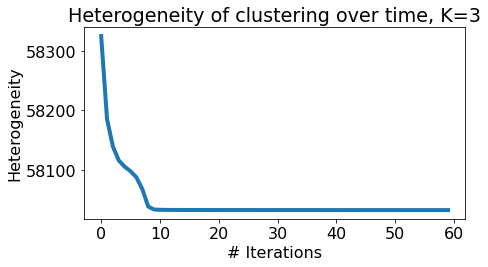

In [41]:
k = 3
heterogeneity = []
initial_centroids = get_initial_centroids(tf_idf, k, seed=0)
centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                       record_heterogeneity=heterogeneity, verbose=True)
plot_heterogeneity(heterogeneity, k)

In [42]:
np.bincount(cluster_assignment)

array([19595, 10427, 29049])

In [34]:
k = 10
heterogeneity = {}
cluster_assignment_dict = {}
import time
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = get_initial_centroids(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)

    # This is the line we added for the next quiz question
    cluster_assignment_dict[seed] = np.bincount(cluster_assignment)
    
#    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
    # And this is the modified print statement
    print('seed={0:06d}, heterogeneity={1:.5f}, cluster_distribution={2}'.format(seed, heterogeneity[seed], 
                                           cluster_assignment_dict[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

seed=000000, heterogeneity=57457.52442, cluster_distribution=[18047  3824  5671  6983  1492  1730  3882  3449  7139  6854]
seed=020000, heterogeneity=57533.20100, cluster_distribution=[ 3142   768  3566  2277 15779  7278  6146  7964  6666  5485]
seed=040000, heterogeneity=57512.69257, cluster_distribution=[ 5551  6623   186  2999  8487  3893  6807  2921  3472 18132]
seed=060000, heterogeneity=57466.97925, cluster_distribution=[ 3014  3089  6681  3856  8080  7222  3424   424  5381 17900]
seed=080000, heterogeneity=57494.92990, cluster_distribution=[17582  1785  7215  3314  6285   809  5930  6791  5536  3824]
seed=100000, heterogeneity=57484.42210, cluster_distribution=[ 6618  1337  6191  2890 16969  4983  5242  3892  5562  5387]
seed=120000, heterogeneity=57554.62410, cluster_distribution=[ 6118  5841  4964  8423  4302  3183 16481  1608  5524  2627]
129.29057931900024


In [35]:
def smart_initialize(data, k, seed=None):
    '''Use k-means++ to initialize a good set of centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    centroids = np.zeros((k, data.shape[1]))
    
    # Randomly choose the first centroid.
    # Since we have no prior knowledge, choose uniformly at random
    idx = np.random.randint(data.shape[0])
    centroids[0] = data[idx,:].toarray()
    # Compute distances from the first centroid chosen to all the other data points
    squared_distances = pairwise_distances(data, centroids[0:1], metric='euclidean').flatten()**2
    
    for i in range(1, k):
        # Choose the next centroid randomly, so that the probability for each data point to be chosen
        # is directly proportional to its squared distance from the nearest centroid.
        # Roughtly speaking, a new centroid should be as far as from ohter centroids as possible.
        idx = np.random.choice(data.shape[0], 1, p=squared_distances/sum(squared_distances))
        centroids[i] = data[idx,:].toarray()
        # Now compute distances from the centroids to all data points
        squared_distances = np.min(pairwise_distances(data, centroids[0:i+1], metric='euclidean')**2,axis=1)
    
    return centroids

In [36]:
%%time 

k = 10
heterogeneity_smart = {}
seeds = [0, 20000, 40000, 60000, 80000, 100000, 120000]
for seed in seeds:
    initial_centroids = smart_initialize(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity_smart[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity_smart[seed]))
    sys.stdout.flush()


seed=000000, heterogeneity=57468.63808
seed=020000, heterogeneity=57486.94263
seed=040000, heterogeneity=57454.35926
seed=060000, heterogeneity=57530.43659
seed=080000, heterogeneity=57454.51852
seed=100000, heterogeneity=57471.56674
seed=120000, heterogeneity=57523.28839
CPU times: user 2min 34s, sys: 4.72 s, total: 2min 39s
Wall time: 2min 39s


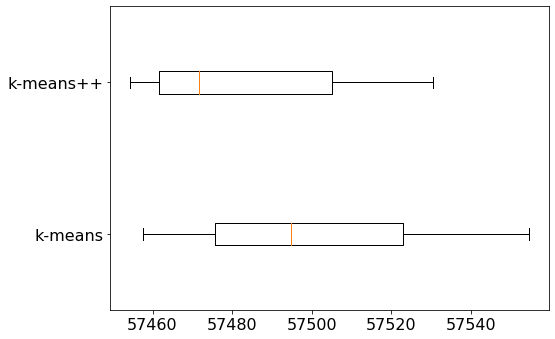

In [37]:
plt.figure(figsize=(8,5))
plt.boxplot([list(heterogeneity.values()), list(heterogeneity_smart.values())], vert=False)
plt.yticks([1, 2], ['k-means', 'k-means++'])
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [38]:
def kmeans_multiple_runs(data, k, maxiter, num_runs, seed_list=None, verbose=False):
    heterogeneity = {}
    
    min_heterogeneity_achieved = float('inf')
    best_seed = None
    final_centroids = None
    final_cluster_assignment = None
    
    for i in range(num_runs):
        
        # Use UTC time if no seeds are provided 
        if seed_list is not None: 
            seed = seed_list[i]
            np.random.seed(seed)
        else: 
            seed = int(time.time())
            np.random.seed(seed)
        
        # Use k-means++ initialization
        # YOUR CODE HERE
        initial_centroids = smart_initialize(data, k, seed)
        
        # Run k-means
        # YOUR CODE HERE
        centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
        
        # To save time, compute heterogeneity only once in the end
        # YOUR CODE HERE
        heterogeneity[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
        
        if verbose:
            print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
            sys.stdout.flush()
        
        # if current measurement of heterogeneity is lower than previously seen,
        # update the minimum record of heterogeneity.
        if heterogeneity[seed] < min_heterogeneity_achieved:
            min_heterogeneity_achieved = heterogeneity[seed]
            best_seed = seed
            final_centroids = centroids
            final_cluster_assignment = cluster_assignment
    
    # Return the centroids and cluster assignments that minimize heterogeneity.
    return final_centroids, final_cluster_assignment

In [39]:
%%time
import numpy as np 

def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

centroids = {}
cluster_assignment = {}
heterogeneity_values = []
k_list = [2, 10, 25, 50, 100]
#seed_list = [0]
# Uncomment the following line to run the plot with all the seeds (it may take about an hour to finish).
seed_list = [0, 20000, 40000, 60000, 80000, 100000, 120000]

for k in k_list:
    heterogeneity = []
    centroids[k], cluster_assignment[k] = kmeans_multiple_runs(tf_idf, k, maxiter=400,
                                                               num_runs=len(seed_list),                                                               seed_list=seed_list,
                                                               verbose=True)
    score = compute_heterogeneity(tf_idf, k, centroids[k], cluster_assignment[k])
    heterogeneity_values.append(score)

seed=000000, heterogeneity=58224.59913
seed=020000, heterogeneity=58179.57453
seed=040000, heterogeneity=58179.57453
seed=060000, heterogeneity=58179.57453
seed=080000, heterogeneity=58224.59952
seed=100000, heterogeneity=58179.57453
seed=120000, heterogeneity=58179.57453
seed=000000, heterogeneity=57468.63808
seed=020000, heterogeneity=57486.94263
seed=040000, heterogeneity=57454.35926
seed=060000, heterogeneity=57530.43659
seed=080000, heterogeneity=57454.51852
seed=100000, heterogeneity=57471.56674
seed=120000, heterogeneity=57523.28839
seed=000000, heterogeneity=56913.24052
seed=020000, heterogeneity=56961.01793
seed=040000, heterogeneity=56904.99744
seed=060000, heterogeneity=56858.67830
seed=080000, heterogeneity=56955.74619
seed=100000, heterogeneity=56973.02116
seed=120000, heterogeneity=56934.20148
seed=000000, heterogeneity=56399.72145
seed=020000, heterogeneity=56322.64583
seed=040000, heterogeneity=56314.32239
seed=060000, heterogeneity=56278.53939
seed=080000, heterogeneit

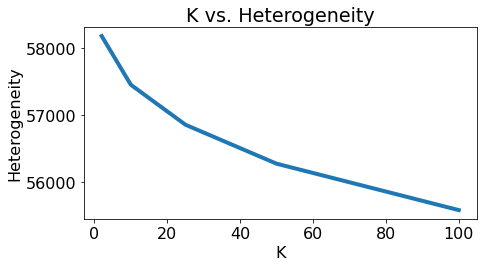

In [40]:
plot_k_vs_heterogeneity(k_list, heterogeneity_values)

In [69]:
def visualize_document_clusters(wiki, tf_idf, centroids, cluster_assignment, k, map_word_to_index, display_content=True):
    '''wiki: original dataframe
       tf_idf: data matrix, sparse matrix format
       map_index_to_word: SFrame specifying the mapping betweeen words and column indices
       display_content: if True, display 8 nearest neighbors of each centroid'''
    map_index_to_word =  {v:k for k,v in map_word_to_index.items()}
    print('==========================================================')
    # Visualize each cluster c
    for c in range(k):
        # Cluster heading
        print('Cluster {0:d}    '.format(c)),
        # Print top 5 words with largest TF-IDF weights in the cluster
        idx = centroids[c].argsort()[::-1]
        for i in range(5): # Print each word along with the TF-IDF weight
            print('{0:s}:{1:.3f}'.format(map_index_to_word[idx[i]], centroids[c][idx[i]])),
        print('')
        
        if display_content:
            # Compute distances from the centroid to all data points in the cluster,
            # and compute nearest neighbors of the centroids within the cluster.
            distances = pairwise_distances(tf_idf, centroids[c].reshape(1, -1), metric='euclidean').flatten()
            distances[cluster_assignment!=c] = float('inf') # remove non-members from consideration
            
            nearest_neighbors = distances.argsort()
            
            # For 8 nearest neighbors, print the title as well as first 180 characters of text.
            # Wrap the text at 80-character mark.
            for i in range(8):
                text = ' '.join(wiki[nearest_neighbors[i]]['text'].split(None, 25)[0:25])
                print('\n* {0:50s} {1:.5f}\n  {2:s}\n  {3:s}'.format(wiki[nearest_neighbors[i]]['name'],
                    distances[nearest_neighbors[i]], text[:90], text[90:180] if len(text) > 90 else ''))
        print('==========================================================')

In [70]:
'''Notice the extra pairs of parentheses for centroids and cluster_assignment.
   The centroid and cluster_assignment are still inside the npz file,
   and we need to explicitly indicate when to load them into memory.'''
visualize_document_clusters(wiki, tf_idf, centroids[2], cluster_assignment[2], 2, map_index_to_word)

Cluster 0    
she:0.021
university:0.015
her:0.013
he:0.012
served:0.010


* Kayee Griffin                                      0.97358
  kayee frances griffin born 6 february 1950 is an australian politician and former australi
  an labor party member of the new south wales legislative council serving

* %C3%81ine Hyland                                   0.97370
  ine hyland ne donlon is emeritus professor of education and former vicepresident of univer
  sity college cork ireland she was born in 1942 in athboy co

* Christine Robertson                                0.97373
  christine mary robertson born 5 october 1948 is an australian politician and former austra
  lian labor party member of the new south wales legislative council serving

* Anita Kunz                                         0.97471
  anita e kunz oc born 1956 is a canadianborn artist and illustratorkunz has lived in london
   new york and toronto contributing to magazines and working

* Barry Sullivan (lawyer)    

In [71]:
k = 10
visualize_document_clusters(wiki, tf_idf, centroids[k], cluster_assignment[k], k, map_index_to_word)

Cluster 0    
he:0.012
art:0.011
his:0.009
book:0.008
that:0.008


* Wilson McLean                                      0.97661
  wilson mclean born 1937 is a scottish illustrator and artist he has illustrated primarily 
  in the field of advertising but has also provided cover art

* Tang Xiyang                                        0.97988
  tang xiyang born january 30 1930 in miluo hunan province is a chinese environmentalist he 
  was awarded the 2007 ramon magsaysay award for peace and

* David Salle                                        0.98168
  david salle born 1952 is an american painter printmaker and stage designer who helped defi
  ne postmodern sensibility salle was born in norman oklahoma he earned

* Alberto Blanco (poet)                              0.98172
  alberto blanco is considered one of mexicos most important poets born in mexico city on fe
  bruary 18 1951 he spent his childhood and adolescence in

* John Donald (jewellery designer)                   0.98290


In [72]:
np.bincount(cluster_assignment[10])

array([19618,  3857,  4173,  5219,  1743,  6900,  5530,  1348,  4384,
        6299])

In [75]:
visualize_document_clusters(wiki, tf_idf, centroids[25], cluster_assignment[25], 25,
                            map_index_to_word, display_content=False) # turn off text for brevity

Cluster 0    
poetry:0.053
novel:0.043
book:0.042
published:0.039
fiction:0.034

Cluster 1    
film:0.100
theatre:0.039
films:0.036
directed:0.029
actor:0.028

Cluster 2    
law:0.143
court:0.087
judge:0.066
district:0.045
justice:0.042

Cluster 3    
republican:0.061
senate:0.050
district:0.044
state:0.039
democratic:0.037

Cluster 4    
music:0.114
piano:0.047
orchestra:0.039
composition:0.038
composer:0.034

Cluster 5    
album:0.116
released:0.058
her:0.056
single:0.046
music:0.040

Cluster 6    
music:0.055
jazz:0.038
album:0.028
song:0.020
records:0.019

Cluster 7    
board:0.028
business:0.027
economics:0.026
chairman:0.025
president:0.025

Cluster 8    
he:0.011
his:0.009
that:0.009
world:0.007
book:0.007

Cluster 9    
research:0.050
university:0.039
professor:0.038
science:0.030
institute:0.021

Cluster 10    
foreign:0.075
ambassador:0.063
affairs:0.057
security:0.044
nations:0.042

Cluster 11    
baseball:0.110
league:0.103
major:0.052
games:0.047
season:0.045

Cluster 12  

In [76]:
k=100
visualize_document_clusters(wiki, tf_idf, centroids[k], cluster_assignment[k], k,
                            map_index_to_word, display_content=False)
# turn off text for brevity -- turn it on if you are curious ;)

Cluster 0    
psychology:0.195
psychological:0.066
research:0.057
psychologist:0.045
cognitive:0.041

Cluster 1    
film:0.213
festival:0.060
films:0.054
directed:0.039
feature:0.037

Cluster 2    
law:0.146
court:0.097
judge:0.074
district:0.051
justice:0.045

Cluster 3    
mayor:0.137
city:0.049
council:0.040
elected:0.032
election:0.030

Cluster 4    
music:0.147
composition:0.048
composer:0.047
orchestra:0.026
composers:0.025

Cluster 5    
album:0.108
her:0.078
billboard:0.075
chart:0.072
singles:0.067

Cluster 6    
music:0.052
songs:0.025
records:0.023
song:0.022
album:0.022

Cluster 7    
chairman:0.057
board:0.048
president:0.035
executive:0.033
ceo:0.025

Cluster 8    
german:0.120
germany:0.042
der:0.030
berlin:0.025
die:0.017

Cluster 9    
india:0.092
indian:0.084
sabha:0.038
lok:0.033
singh:0.028

Cluster 10    
czech:0.207
prague:0.124
republic:0.046
czechoslovakia:0.032
vclav:0.021

Cluster 11    
soccer:0.294
league:0.071
indoor:0.063
team:0.055
season:0.052

Cluster 1

In [85]:
sum(np.bincount(cluster_assignment[k]) < 236) / k

0.33

In [81]:
k

100

In [86]:
sum(np.bincount(cluster_assignment[k]) < 236) 

33